In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
import os,sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import interp
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def load_data_TF2(indel_list,data_path): # cell type specific  ## random samples for reactome is not enough, need borrow some from keggp
    import random
    import numpy as np
    xxdata_list = []
    yydata = []
    count_set = [0]
    count_setx = 0
    for i in indel_list:#len(h_tf_sc)):
        xdata = np.load(data_path+'/Nxdata_tf' + str(i) + '.npy')
        ydata = np.load(data_path+'/ydata_tf' + str(i) + '.npy')
        for k in range(len(ydata)):
            xxdata_list.append(xdata[k,:,:,:])
            yydata.append(ydata[k])
        count_setx = count_setx + len(ydata)
        count_set.append(count_setx)
        #print (i,len(ydata))
    yydata_array = np.array(yydata)
    yydata_x = yydata_array.astype('int')
    #print (np.array(xxdata_list).shape)
    return((np.array(xxdata_list),yydata_x,count_set))

In [3]:
length_TF_train =int(1)
length_TF_test =int(1)

data_path_train = "NEPDF_data_train"
data_path_test = "NEPDF_data_test"

num_classes = int(2)

train_TF = [i for i in range (length_TF_train)]
test_TF = [i for i in range (length_TF_test)]

(x_train, y_train,count_set_train) = load_data_TF2(train_TF,data_path_train)
(x_test, y_test,count_set) = load_data_TF2(test_TF,data_path_test)
print(x_train.shape, 'x_train samples')
print(x_test.shape, 'x_test samples')

(882, 32, 32, 1) x_train samples
(420, 32, 32, 1) x_test samples


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_test.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
batch_size=x_train.shape[0]
epochs=500
model_name='trained.h5'

In [6]:
save_dir="train_model"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, verbose=0, mode='max')
checkpoint1 = ModelCheckpoint(filepath=save_dir + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                              verbose=1, save_best_only=False, save_weights_only=False, mode='min', period=1)
checkpoint2 = ModelCheckpoint(filepath=save_dir + '/weights.hdf5', monitor='val_accuracy', verbose=1,
                              save_best_only=True, mode='max', period=1)
callbacks_list = [checkpoint2, early_stopping]


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_split=0.2,
          shuffle=True, callbacks=callbacks_list)


Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.4993
Epoch 00001: val_accuracy improved from -inf to 0.48588, saving model to train_model/weights.hdf5
1/1 [==============================] - 0s 309ms/step - loss: 0.6930 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.4859
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4950
Epoch 00002: val_accuracy did not improve from 0.48588
1/1 [==============================] - 0s 69ms/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.4859
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4596
Epoch 00003: val_accuracy did not improve from 0.48588
1/1 [==============================] - 0s 67ms/step - loss: 0.6939 - accuracy: 0.4596 - val_loss: 0.6930 - val_accuracy: 0.4802
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5007
Epoch 00004: val_accuracy improved 

Epoch 29/500
1/1 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5645
Epoch 00029: val_accuracy did not improve from 0.53107
1/1 [==============================] - 0s 64ms/step - loss: 0.6913 - accuracy: 0.5645 - val_loss: 0.6921 - val_accuracy: 0.5254
Epoch 30/500
1/1 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.5333
Epoch 00030: val_accuracy did not improve from 0.53107
1/1 [==============================] - 0s 68ms/step - loss: 0.6913 - accuracy: 0.5333 - val_loss: 0.6920 - val_accuracy: 0.5198
Epoch 31/500
1/1 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5135
Epoch 00031: val_accuracy did not improve from 0.53107
1/1 [==============================] - 0s 69ms/step - loss: 0.6919 - accuracy: 0.5135 - val_loss: 0.6920 - val_accuracy: 0.5254
Epoch 32/500
1/1 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5461
Epoch 00032: val_accuracy did not improve from 0.53107
1/1 [===============

1/1 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5816
Epoch 00058: val_accuracy did not improve from 0.55367
1/1 [==============================] - 0s 75ms/step - loss: 0.6889 - accuracy: 0.5816 - val_loss: 0.6908 - val_accuracy: 0.5424
Epoch 59/500
1/1 [==============================] - ETA: 0s - loss: 0.6889 - accuracy: 0.5957
Epoch 00059: val_accuracy did not improve from 0.55367
1/1 [==============================] - 0s 78ms/step - loss: 0.6889 - accuracy: 0.5957 - val_loss: 0.6907 - val_accuracy: 0.5480
Epoch 60/500
1/1 [==============================] - ETA: 0s - loss: 0.6891 - accuracy: 0.5730
Epoch 00060: val_accuracy did not improve from 0.55367
1/1 [==============================] - 0s 74ms/step - loss: 0.6891 - accuracy: 0.5730 - val_loss: 0.6906 - val_accuracy: 0.5480
Epoch 61/500
1/1 [==============================] - ETA: 0s - loss: 0.6888 - accuracy: 0.6000
Epoch 00061: val_accuracy improved from 0.55367 to 0.55932, saving model to train_model/

1/1 [==============================] - ETA: 0s - loss: 0.6854 - accuracy: 0.5830
Epoch 00087: val_accuracy did not improve from 0.56497
1/1 [==============================] - 0s 68ms/step - loss: 0.6854 - accuracy: 0.5830 - val_loss: 0.6883 - val_accuracy: 0.5537
Epoch 88/500
1/1 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5915
Epoch 00088: val_accuracy did not improve from 0.56497
1/1 [==============================] - 0s 72ms/step - loss: 0.6849 - accuracy: 0.5915 - val_loss: 0.6882 - val_accuracy: 0.5480
Epoch 89/500
1/1 [==============================] - ETA: 0s - loss: 0.6859 - accuracy: 0.6099
Epoch 00089: val_accuracy did not improve from 0.56497
1/1 [==============================] - 0s 77ms/step - loss: 0.6859 - accuracy: 0.6099 - val_loss: 0.6881 - val_accuracy: 0.5480
Epoch 90/500
1/1 [==============================] - ETA: 0s - loss: 0.6855 - accuracy: 0.6014
Epoch 00090: val_accuracy did not improve from 0.56497
1/1 [============================

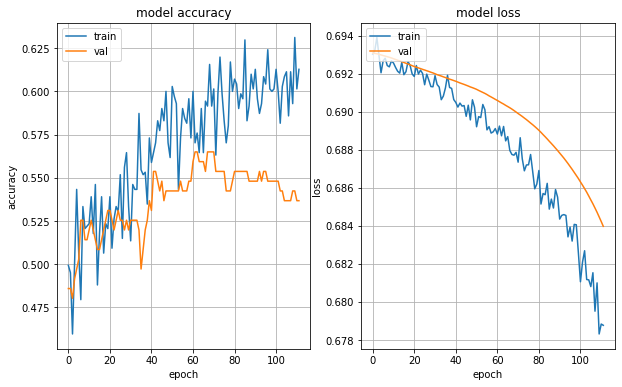

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'val'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.savefig(save_dir+'/end_result.pdf')

In [11]:
model_path=save_dir+"/"+"weights.hdf5"
model.load_weights(model_path)
y_predict=model.predict(x_test)

In [12]:
r=0
for i in range(y_predict.shape[0]):
    if y_predict[i]>0.5:
        y_predict[i]=1
    else:
        y_predict[i]=0
    if (y_predict[i]==y_test[i]):
        r=r+1
print (r/y_test.shape[0])      

0.6785714285714286


AUC: 0.6785714285714286


'\nDRAWING...\n'

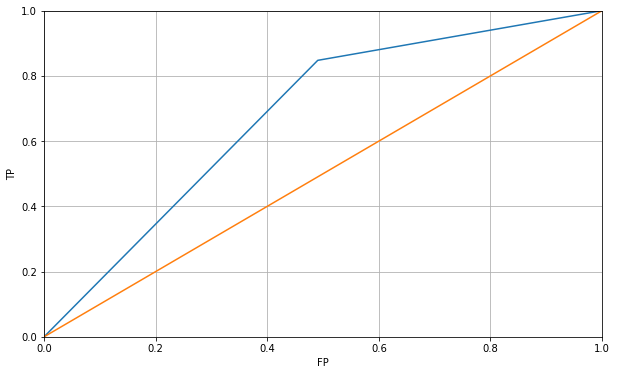

In [13]:
plt.figure(figsize=(10, 6))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict, pos_label=1)
plt.plot(fpr, tpr)
plt.grid()
plt.plot([0, 1], [0, 1])
plt.xlabel('FP')
plt.ylabel('TP')
plt.ylim([0, 1])
plt.xlim([0, 1])
auc = np.trapz(tpr, fpr)
print('AUC:', auc)
plt.savefig(save_dir + '/overall.pdf')
'''
DRAWING...
'''